##**Hate-Speech Detection**
With the world being super reliant on social media as one of the sources of entertainment, it is no surprise that it has also led to spreading of hate too.
In this notebook, we aim to train a model to be able to detect Hate-Speech

**Importing Libraries & Loading Data**

In [1]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import string
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords

In [2]:
nltk.download('stopwords')
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data = pd.read_csv('/content/hate-speech.csv')
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


**Data Pre-Processing**

In [4]:
data["labels"] = data["class"].map({0: "Hate Speech",
                                    1: "Offensive Language",
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


In [5]:
#Considering only 2 columns for training purpose
data = data[["tweet", "labels"]]
print(data.head())

                                               tweet                 labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language


In [6]:
#Function to clean the dataset

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [7]:
data["tweet"] = data["tweet"].apply(clean)

**Bar Graph to understand distribution of data**

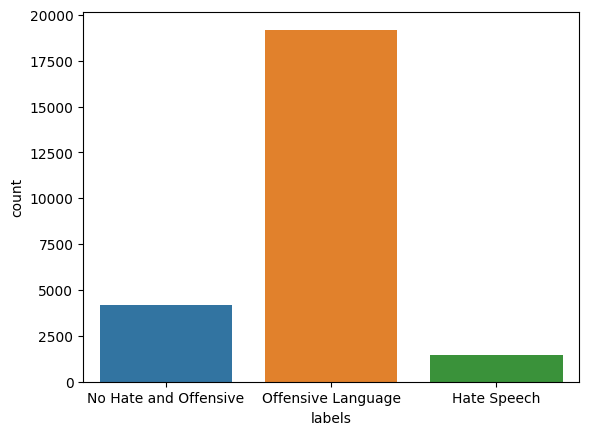

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data = data, x = 'labels')
plt.show()

*The distribution is pretty skewed which can lead our machine learning model to not be able to correctly predict because of the bias created*

**Splitting the dataset and training the model**

In [9]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
y_test_predict = clf.predict(X_test)

**Testing on a sample data**

In [11]:
sample = "Let's unite and kill all the people who are protesting against the government"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['Hate Speech']


**Performance metric evaluation**

In [12]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [13]:
print("The precision for Tree is ",precision_score(y_test, y_test_predict, average='micro'))
print("The recall for Tree is ",recall_score(y_test, y_test_predict, average='micro'),"\n")

The precision for Tree is  0.8738232057708767
The recall for Tree is  0.8738232057708767 



Confusion Matrix Tree : 
 [[ 151   37  277]
 [  32 1122  225]
 [ 241  220 5874]] 


-- Confusion Matrix --


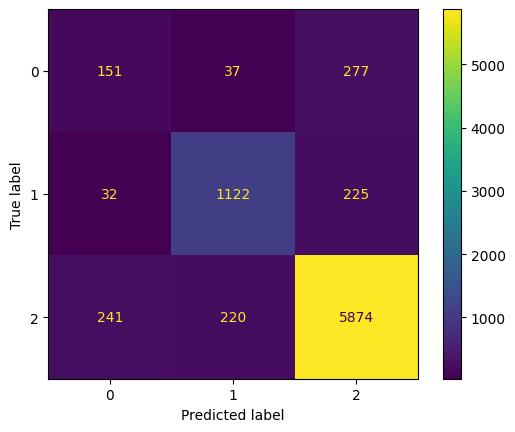

In [15]:
print("Confusion Matrix Tree : \n", confusion_matrix(y_test, y_test_predict),"\n\n")
confusion_matrix = confusion_matrix(y_test, y_test_predict)

print("-- Confusion Matrix --")
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()